#Pasang Library

In [12]:
!pip install ucimlrepo

In [13]:
import tensorflow
from tensorflow import keras
from sklearn.model_selection import train_test_split
import seaborn as sns
import pandas as pd
from sklearn.metrics import confusion_matrix
from ucimlrepo import fetch_ucirepo
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report, precision_recall_curve,confusion_matrix, accuracy_score
import matplotlib.pyplot as plt

#Preprocessing Data

In [14]:


# Dapatkan dataset
estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition = fetch_ucirepo(id=544)

# Jadikan Pandas Dataset
X = estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition.data.features
y = estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition.data.targets

# Metadata
print(estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition.metadata)

# Informasi Variabel
print(estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition.variables)


{'uci_id': 544, 'name': 'Estimation of Obesity Levels Based On Eating Habits and Physical Condition ', 'repository_url': 'https://archive.ics.uci.edu/dataset/544/estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition', 'data_url': 'https://archive.ics.uci.edu/static/public/544/data.csv', 'abstract': 'This dataset include data for the estimation of obesity levels in individuals from the countries of Mexico, Peru and Colombia, based on their eating habits and physical condition. ', 'area': 'Health and Medicine', 'tasks': ['Classification', 'Regression', 'Clustering'], 'characteristics': ['Multivariate'], 'num_instances': 2111, 'num_features': 16, 'feature_types': ['Integer'], 'demographics': ['Gender', 'Age'], 'target_col': ['NObeyesdad'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2019, 'last_updated': 'Tue Sep 10 2024', 'dataset_doi': '10.24432/C5H31Z', 'creators': [], 'intro_paper': {'ID': 358, 'type': 

In [15]:

# Identifikasi fitur numerik dan kategorikal
categorical_features = X.select_dtypes(include=['object']).columns
numerical_features = X.select_dtypes(exclude=['object']).columns

# Buat transformer untuk preprocessing seperti normalisasi pada data numerik
# dan one hot encoding untuk data kategorical
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# Membuat pipa preprocessing
pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

# Lakukan preprocessing
X_processed = pipeline.fit_transform(X)

# Lakukan encoding ke label
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y.values.ravel())


x_train, x_test, y_train, y_test = train_test_split(X_processed, y_encoded, test_size=0.2, random_state=42)
print(X_processed)

[[ 21.         1.62      64.       ...   0.         1.         0.      ]
 [ 21.         1.52      56.       ...   0.         1.         0.      ]
 [ 23.         1.8       77.       ...   0.         1.         0.      ]
 ...
 [ 22.524036   1.752206 133.689352 ...   0.         1.         0.      ]
 [ 24.361936   1.73945  133.346641 ...   0.         1.         0.      ]
 [ 23.664709   1.738836 133.472641 ...   0.         1.         0.      ]]


#Pelatihan Model

In [16]:
model = keras.Sequential(layers=[
    keras.layers.Input(shape=(x_train.shape[1],)),
    keras.layers.Dense(200, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(len(label_encoder.classes_), activation='softmax') # Output layer sesuai dengan panjang label
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy']) # sparse_categorical_crossentropy untuk loss


In [17]:
# Latih model
history = model.fit(x_train, y_train, epochs=50, batch_size=32)




Epoch 1/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1658 - loss: 3.8234
Epoch 2/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3258 - loss: 1.6141
Epoch 3/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4489 - loss: 1.4015
Epoch 4/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5126 - loss: 1.2915
Epoch 5/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5474 - loss: 1.1620
Epoch 6/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6125 - loss: 1.0342
Epoch 7/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6280 - loss: 0.9729
Epoch 8/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6622 - loss: 0.9001
Epoch 9/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6624 - loss: 0.8417
Epoch 10/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7197 - loss: 0.7575
Epoch 11/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7268 - loss: 0.7127
Epoch 12/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6868 - lo

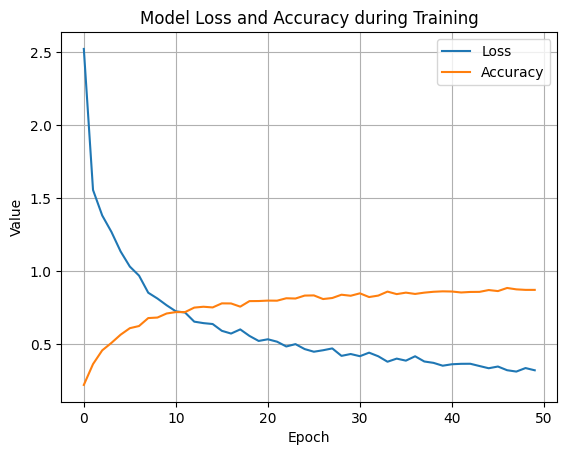

In [18]:
# Plot history dari pelatihan model
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['accuracy'], label='Accuracy')
plt.title('Model Loss and Accuracy during Training')
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

#Evaluasi Model

In [19]:
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
print(classification_report(y_test, y_pred_classes))

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
              precision    recall  f1-score   support

           0       0.86      0.89      0.88        56
           1       0.71      0.74      0.72        62
           2       0.89      0.92      0.91        78
           3       0.97      0.98      0.97        58
           4       1.00      1.00      1.00        63
           5       0.67      0.75      0.71        56
           6       0.85      0.58      0.69        50

    accuracy                           0.85       423
   macro avg       0.85      0.84      0.84       423
weighted avg       0.85      0.85      0.85       423



In [20]:

def plot_confusion_matrix(y, y_pred, ax):
    acc = round(accuracy_score(y, y_pred), 4)
    cm_result = confusion_matrix(y, y_pred)
    sns.heatmap(cm_result, annot=True, fmt=".0f", ax=ax, cmap='Blues_r') #
    ax.set_xlabel('Predicted value')
    ax.set_ylabel('Actual value')
    ax.set_title(f'Model Accuracy: {acc*100}%', size=10)

In [21]:
def evaluate_model(model, x_test, y_test, model_name="Unknown Model"):
  y_pred_prob = model.predict(x_test)
  y_pred = np.argmax(y_pred_prob, axis=1)  # Label kelas yang diprediksi

  fig, axes = plt.subplots(1, 2, figsize=(12, 5))

  fig.suptitle(f'{model_name} Evaluation Metrics', fontsize=16)

  # Confusion Matrix
  plot_confusion_matrix(y_test, y_pred, axes[0])

  # Precision, Recall, dan skor F1
  report = classification_report(y_test, y_pred, output_dict=True)
  metrics_data = {
      'Metric': [],
      'Score': []
  }
  # Metrik untuk hal yang relevan
  for label, metrics in report.items():
      if label not in ['accuracy', 'macro avg', 'weighted avg']:
        for metric in ['precision', 'recall', 'f1-score']:
          metrics_data['Metric'].append(f'{label}_{metric}')
          metrics_data['Score'].append(metrics[metric])

  metrics_df = pd.DataFrame(metrics_data)


  barplot = sns.barplot(x='Metric', y='Score', data=metrics_df, ax=axes[1], palette='viridis') #
  axes[1].set_ylim(0, 1)
  axes[1].set_title('Classification Metrics per Class')
  axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45, ha='right')


  for p in barplot.patches:
      barplot.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', xytext=(0, 5), textcoords='offset points')


  plt.tight_layout(rect=[0, 0.03, 1, 0.95])
  plt.show()

  print("\nClassification Report:")
  print(classification_report(y_test, y_pred))

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


/tmp/ipython-input-2688010602.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x='Metric', y='Score', data=metrics_df, ax=axes[1], palette='viridis') #
/tmp/ipython-input-2688010602.py:31: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45, ha='right')


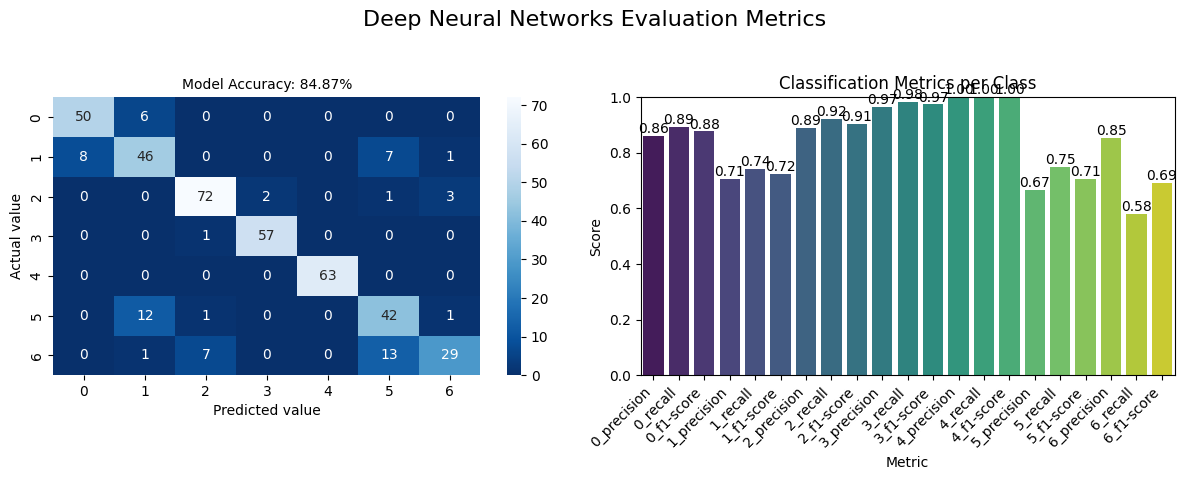


Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.89      0.88        56
           1       0.71      0.74      0.72        62
           2       0.89      0.92      0.91        78
           3       0.97      0.98      0.97        58
           4       1.00      1.00      1.00        63
           5       0.67      0.75      0.71        56
           6       0.85      0.58      0.69        50

    accuracy                           0.85       423
   macro avg       0.85      0.84      0.84       423
weighted avg       0.85      0.85      0.85       423



In [22]:
evaluate_model(model, x_test, y_test, model_name="Deep Neural Networks")